In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:

def evaluate_knn(X, y, dataset_name):
    print(f"\n--- {dataset_name} ---")

    # Preprocessing
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Try different k values
    k_values = range(1, 21)
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Plot accuracy vs. k
    plt.figure(figsize=(6,4))
    plt.plot(k_values, accuracies, marker='o', linestyle='-')
    plt.title(f'KNN Accuracy vs. K - {dataset_name}')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


    # Find best k
    best_k = k_values[np.argmax(accuracies)]
    best_acc = max(accuracies)
    print("k_values shape:", len(k_values))
    print("accuracies shape:", len(accuracies))


    # Print result
    print(f"{dataset_name} → Best k = {best_k}, Accuracy = {best_acc:.4f}")

How this function works?
First We've to Splits dataset into training and testing which ratio is 70% Training and 30% Testing.In that Training Splitting We've to define random_state=42 which means randomness so result are reproducible.

Why we needed KNN?
It uses for distances like Euclidean, Manhattan etc.

if one feature has larger values , it will dominate distance calculation.

StandardScaler Standerlizes features mean 0,std 1 so all features are on the same scale.

Define k values
It is tests k values from 1 to 20 neighbors and k is also define as nearest points used to classify a test sample.

After we are trainig KNN model predict test lables compute accuracy and store acuuracy in the list now accuracies has 20 values.

KNN model trained after that we're applying find index of the highest accuracy.after that picks the k corresponding to that index to find best accuracy value.


--- Dataset 1 (Binary, 5 Features) ---


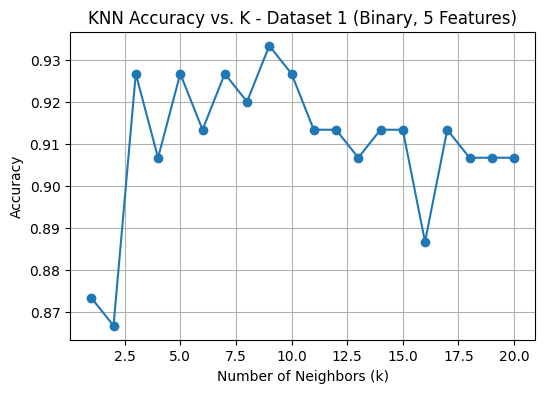

k_values shape: 20
accuracies shape: 20
Dataset 1 (Binary, 5 Features) → Best k = 9, Accuracy = 0.9333


In [ ]:
import pandas as pd
X1,y1 = make_classification(
    n_samples=500,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

evaluate_knn(X1,y1, "Dataset 1 (Binary, 5 Features)")

Here, The Bottom Axis represents the value of 'k'. it's like asking "How many neighbors should my data point look to make a decsion?" The graph tests value from 1 to 20.

The left Axis shows how good the model is at making correct predictions.A higher value means the model is more accurate.

This line shows the relationship between the number of neighbors and the model's accuracy.You can see it goes up and down as 'k' changes.

The main goal is to find the peak of blue line. using too few neighbors(low 'k') makes the model overly sensitive to noise,reducing accuracy.Using too many neighbors (high 'k') makes the model too general,also lowering its accuracy.

The "sweet pot" is at the highest point of curve ,which represents the best bealances.in this case, the graph clearly shows that k=9 provides the maximum accuracy 93%, making it the best choices for this dataset.


--- Dataset 2 (Multiclass, 10 features) ---


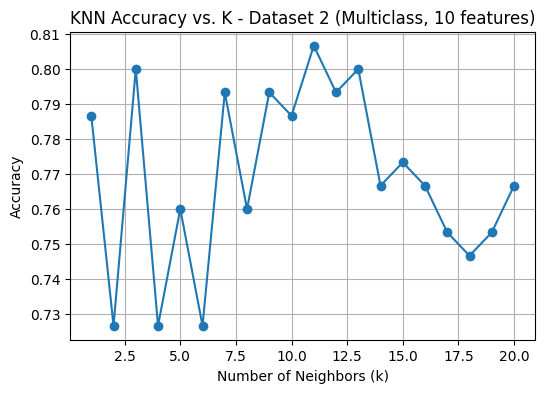

k_values shape: 20
accuracies shape: 20
Dataset 2 (Multiclass, 10 features) → Best k = 11, Accuracy = 0.8067


In [ ]:
X2, y2 = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=42
)

evaluate_knn(X2, y2, "Dataset 2 (Multiclass, 10 features)")

Here, This graph helps find the best number of neighbors ('k') for a KNN model on "Dataset 2". By plotting accuracy against different 'k' values, it identifies the optimal setting.

The highest point on the graph occurs when k=11, which gives the best prediction accuracy of approximately 80.7%. Therefore, 11 is the ideal number of neighbors to use for this specific dataset.



--- Dataset 3 (Binary, 15 features) ---


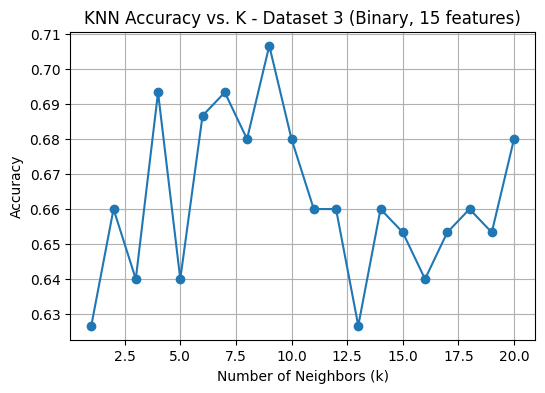

k_values shape: 20
accuracies shape: 20
Dataset 3 (Binary, 15 features) → Best k = 9, Accuracy = 0.7067


In [ ]:
X3, y3 = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=6,
    n_redundant=3,
    n_classes=2,
    flip_y=0.1,
    class_sep=0.5,
    random_state=42
)

evaluate_knn(X3, y3, "Dataset 3 (Binary, 15 features)")

This graph analyzes "Dataset 3" to find the best number of neighbors ('k') for a KNN model.

By plotting the model's accuracy against different values of 'k', it identifies the optimal setting. The highest accuracy is achieved when k=9, which results in a peak performance of approximately 70.7%. Therefore, 9 is the ideal number of neighbors to use for this dataset.